In [12]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer,ColumnTransformer,make_column_selector
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

In [29]:
hr=pd.read_csv(r"D:\HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [30]:
x,y=hr.drop('left',axis=1),hr['left']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [31]:
trns=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False),make_column_selector(dtype_include='object'))
],remainder='passthrough',verbose_feature_names_out=False)
trns=trns.set_output(transform='pandas')
X_train_trns=trns.fit_transform(X_train)
X_test_trns=trns.transform(X_test)

In [32]:
X_train_trns

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
12224,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.85,0.95,5,236,5,0,0
5896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.62,0.92,5,169,2,0,0
13639,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.91,0.82,4,238,2,0,0
1572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.60,0.85,3,250,2,0,0
12992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.94,0.86,3,221,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.52,0.78,4,237,3,0,0
13418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.50,0.82,2,286,6,0,0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.91,0.56,3,168,2,0,0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.10,0.94,6,260,4,0,0


In [33]:
ohe=OneHotEncoder(sparse_output=False,drop='first').set_output(transform='pandas')
trns=make_column_transformer((ohe,make_column_selector(dtype_include='object')),remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
X_train_trns=trns.fit_transform(X_train)
X_test=trns.transform(X_test)

In [22]:
model=DecisionTreeClassifier(random_state=25,max_depth=2)
model.fit(X_train_trns,y_train)
y_pred=model.predict(X_test_trns)

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      3415
           1       0.88      0.43      0.58      1084

    accuracy                           0.85      4499
   macro avg       0.86      0.71      0.74      4499
weighted avg       0.85      0.85      0.83      4499



In [34]:
hr.select_dtypes(include=object).columns

Index(['Department', 'salary'], dtype='object')

[Text(0.5, 0.8333333333333334, 'number_project <= 0.465\ngini = 0.361\nsamples = 10496\nvalue = [8013, 2483]\nclass = 0'),
 Text(0.25, 0.5, 'time_spend_company <= 2.5\ngini = 0.48\nsamples = 2953\nvalue = [1182, 1771]\nclass = 1'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.217\nsamples = 1213\nvalue = [150, 1063]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.483\nsamples = 1740\nvalue = [1032, 708]\nclass = 0'),
 Text(0.75, 0.5, 'promotion_last_5years <= 4.5\ngini = 0.171\nsamples = 7543\nvalue = [6831, 712]\nclass = 0'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.03\nsamples = 6149\nvalue = [6056, 93]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.494\nsamples = 1394\nvalue = [775.0, 619.0]\nclass = 0')]

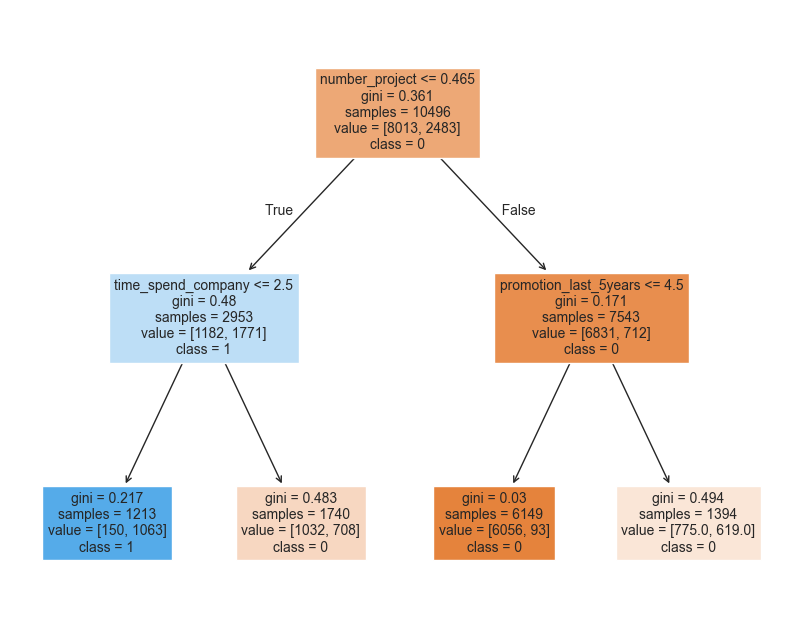

In [62]:
plt.figure(figsize=(10,8))
plot_tree(model,feature_names=X_train_trns.columns.to_list(),class_names=[str(x) for x in y_test.unique()],filled=True,fontsize=10)

## house price 
## decision Tree(Regression)

In [3]:
df=pd.read_csv(r"D:\Datasets\Housing.csv")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [28]:
x,y=df.drop('price',axis=1),df['price']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [37]:
trsn=ColumnTransformer(transformers=[
    ('ohe',OneHotEncoder(sparse_output=False),make_column_selector(dtype_include=object))
],remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')

x_train_trsn=trsn.fit_transform(X_train)
x_test_trsn=trsn.transform(X_test)
x_train_trsn.shape,x_test_trsn.shape

((382, 17), (164, 17))

In [38]:
depth=[None,2,3,4,5]
split=[2,5,10,20,50]
leaf=[1,5,10,20,50]
scores=[]

for d in depth:
    for s in split:
        for l in leaf:
            model=DecisionTreeRegressor(random_state=42,min_samples_leaf=l,min_samples_split=s,max_depth=d)
            model.fit(x_train_trsn,y_train)
            y_pred=model.predict(x_test_trsn)
            scores.append([d,s,l,r2_score(y_test,y_pred)])

df_scores=pd.DataFrame(data=scores,columns=['depth','split','leaf','score'])

In [39]:
df_scores.sort_values(by='score',ascending=False)

,depth,split,leaf,score
117,5.0,20,10,0.553486
107,5.0,5,10,0.553486
102,5.0,2,10,0.553486
112,5.0,10,10,0.553486
110,5.0,10,1,0.552792
...,...,...,...,...
61,3.0,10,5,0.469527
65,3.0,20,1,0.469527
66,3.0,20,5,0.469527
5,NaN,5,1,0.444673


In [42]:
model=DecisionTreeRegressor(max_depth=5,min_samples_split=20,min_samples_leaf=10)
model.fit(x_train_trsn,y_train)
df_features=pd.DataFrame(data={'features':x_train_trsn.columns.to_list(),"Importance":model.feature_importances_})
df_features.sort_values('Importance',ascending=False)

,features,Importance
12,lotsize,0.597972
14,bathrms,0.164202
16,garagepl,0.108027
9,airco_yes,0.034779
11,prefarea_yes,0.031446
15,stories,0.031277
2,recroom_no,0.016244
13,bedrooms,0.016053
10,prefarea_no,0.000000
0,driveway_no,0.000000
